![idea card](../docs/images/card_lunar_new_year_rat.svg)

## Installation from github

 ```pip install git+https://github.com/rn123/Calendrical-Tools#egg=Calendrical-Tools```

 ```from calendrical_tools import candybar```

 ```cal = candybar.TextCandyBar(2020```

 ```cal.prcandybar()```


In [1]:
from pycalcal import pycalcal as pcc
from calendrical_tools import candybar
from calendrical_tools.generate_astrolabe import *

import math
from jinja2 import Template

from IPython.core.display import SVG, Image

In [2]:
# !pip uninstall calendrical_tools -y

In [3]:
# !pip install git+https://github.com/rn123/Calendrical-Tools#egg=Calendrical-Tools

## Text CandyBar

A plain text candybar is the default output. When the code is first run for a new year, a file containing lunar data will be generate which cound take a minute.

In [4]:
year = 2020
cal = candybar.TextCandyBar(year=year, weeks_before=1)

100%|██████████| 54/54 [00:00<00:00, 470.58it/s]


Print your candybar:

In [5]:
%%capture capture --no-stderr
cal.prcandybar()

In [6]:
print(capture.stdout)

52	23 24 25 NM 27 28 29
 1	30 31  1  2  3  4  5
 2	 6  7  8  9 10 11 12
 3	13 14 15 16 17 18 19
 4	20 21 22 23 NM 25 26
 5	27 28 29 30 31  1  2
 6	 3  4  5  6  7  8  9
 7	10 11 12 13 14 15 16
 8	17 18 19 20 21 22 NM
 9	24 25 26 27 28 29  1
10	 2  3  4  5  6  7  8
11	 9 10 11 12 13 14 15
12	16 17 18 19 20 21 22
13	23 NM 25 26 27 28 29
14	30 31  1  2  3  4  5
15	 6  7  8  9 10 11 12
16	13 14 15 16 17 18 19
17	20 21 22 NM 24 25 26
18	27 28 29 30  1  2  3
19	 4  5  6  7  8  9 10
20	11 12 13 14 15 16 17
21	18 19 20 21 NM 23 24
22	25 26 27 28 29 30 31
23	 1  2  3  4  5  6  7
24	 8  9 10 11 12 13 14
25	15 16 17 18 19 20 NM
26	22 23 24 25 26 27 28
27	29 30  1  2  3  4  5
28	 6  7  8  9 10 11 12
29	13 14 15 16 17 18 19
30	NM 21 22 23 24 25 26
31	27 28 29 30 31  1  2
32	 3  4  5  6  7  8  9
33	10 11 12 13 14 15 16
34	17 18 NM 20 21 22 23
35	24 25 26 27 28 29 30
36	31  1  2  3  4  5  6
37	 7  8  9 10 11 12 13
38	14 15 16 NM 18 19 20
39	21 22 23 24 25 26 27
40	28 29 30  1  2  3  4
41	 5  6  7  8  

Current default generates four calendars:

In [7]:
for cal_type in cal.weeks:
    print(len(cal.weeks[cal_type]), cal_type)

54 gregorian
54 islamic
54 hebrew
54 chinese


## SVG CandyBar

In [8]:
cal = candybar.SvgCandyBar()

100%|██████████| 54/54 [00:00<00:00, 442.21it/s]


In [9]:
for cal_type in cal.weeks:
    print(len(cal.weeks[cal_type]), cal_type)

54 gregorian
54 islamic
54 hebrew
54 chinese


In [10]:
cal_color = {
    "iso": "grey;",
    "dim": "lightblue;",
    "highlight": "green;",
    "highlight_bold": "red;",
    "background": "yellow;"
}

cal_color = {
    "iso": "#cc232a;",
    "dim": "#cc232a;",
    "highlight": "#f5ac27;",
    "highlight_bold": "#cc232a;",
    "background": "#a3262a;"
}

cal.bar_heading = ""
cal.cal_color = cal_color
cal.prcandybar()

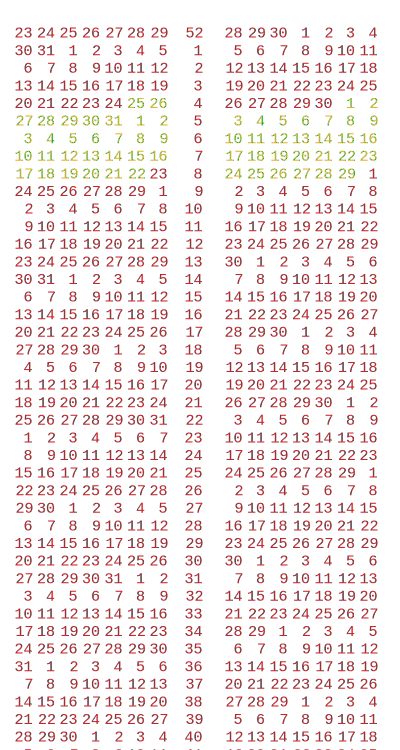

In [11]:
SVG(cal.svg)

## Astrolabe Diagram

In [12]:
plate_parameters = {"Hawaiian Islands": 21.3069}
astrolabe = Astrolabe(plate_parameters=plate_parameters)
plate = astrolabe.plates["Hawaiian Islands"]

In [13]:
animation_parameters = {"from": "0", "to": "233", "begin": "0s", "dur": "5s"}

with open("../calendrical_tools/astrolabe_template.svg") as fp:
    template_text = fp.read()

In [14]:
# Use Inkscape extensions to svg to place different parts of astrolabe into their own layer.
inkscape_attributes = {
    identifier: 'inkscape:label="{}" inkscape:groupmode="layer"'.format(identifier)
    for identifier in identifiers
}

In [15]:
ecliptic={
        "cx": astrolabe.xEclipticCenter,
        "cy": astrolabe.yEclipticCenter,
        "r": astrolabe.RadiusEcliptic,
        "width": 5,
    }

In [16]:
outer_radius = ecliptic["r"] 
inner_radius = ecliptic["r"] - ecliptic["width"]

top_middle_outer =    {"x":(ecliptic["cx"]), "y":(ecliptic["cy"] + outer_radius)}
bottom_middle_outer = {"x":(ecliptic["cx"]), "y":(ecliptic["cy"] - outer_radius)}

top_middle_inner =    {"x":(ecliptic["cx"]), "y":(ecliptic["cy"] + inner_radius)}
bottom_middle_inner = {"x":(ecliptic["cx"]), "y":(ecliptic["cy"] - inner_radius)}


In [17]:
template = Template(template_text)
astrolabe_svg = template.render(
    place_name=plate["location"],
    latitude=plate["latitude"],
    RCapricorn=astrolabe.RadiusCapricorn,
    REquator=astrolabe.RadiusEquator,
    RCancer=astrolabe.RadiusCancer,
    horiz=plate["horizon"],
    almucantor_coords=plate["almucantars"],
    almucantar_center=plate["almucantar_center"],
    azimuth_coords=plate["azimuths"],
    prime_vertical=plate["prime_vertical"],
    ticks=astrolabe.ticks,
    ecliptic=ecliptic,
    top_middle_outer=top_middle_outer,
    bottom_middle_outer=bottom_middle_outer,
    outer_radius=outer_radius,
    inner_radius=inner_radius,
    top_middle_inner=top_middle_inner,
    bottom_middle_inner=bottom_middle_inner,
    stroke_color=cal_color["highlight"],
    background_color=cal_color["background"],
    inkscape=inkscape_attributes,
    animation=animation_parameters,
    moons = [(44.142706092611434, 214.41520455448494),
        (-64.29833725607341, 244.05007530120906),
        (19.338217263234128, 274.11533327404277),
        (17.224801417675735, 304.36003467896535),
        (-64.16194195841945, 334.4763799297398),
        (-25.561893428663097, 4.203505420431007)],
    suns = [214.41713740391424,
        244.05065884583018,
        274.1147430450437,
        304.35973321930214,
        334.47736243435793,
        4.204523538166541]
    )

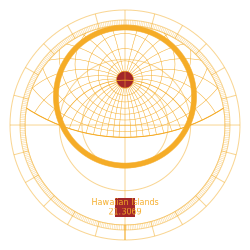

In [18]:
SVG(data=astrolabe_svg)

In [19]:
nms = cal.new_moons
rds = [float(nms[rd][2]) for rd in nms]
solar_coords = []
for rd in rds:
    solar_coords.append(( float(pcc.solar_longitude(rd))))

$\sin\delta = \sin\beta\cos\epsilon + \cos\beta \sin\epsilon \sin\lambda$

Since $\beta = 0$ for the sun, the formula simplifies to:

$\sin\delta = \sin\epsilon \sin\lambda$ 

In [20]:
math.sin(astrolabe._obliquityRadians) * math.sin(math.radians(solar_coords[0]))
tmp = math.sin(astrolabe._obliquityRadians) * math.sin(math.radians(solar_coords[0]))
declination = math.asin(tmp)

In [21]:
with open("../docs/images/rat.svg") as fp:
    rat_svg = fp.read()

In [22]:
rat_template = """
<svg viewbox="0 0 300 300" 
     width="300" height="300" 
     xmlns="http://www.w3.org/2000/svg" 
     xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape" 
     xmlns:xlink="http://www.w3.org/1999/xlink">
<defs>
    <style type="text/css">
        #983: { fill: red;
        } 
    </style>
</defs>
<g id="rat">
    <title>Year of the Rat </title>
        {{ rat }}
</g>
</svg>
"""

In [23]:
template = Template(rat_template)
svg = template.render(rat=rat_svg, background=cal_color["background"])

In [24]:
SVG(svg)

To decode the below a little, the "340 260" is the top middle of the outer circle, the "290 290" is the radius of the outer circle (twice), the "340 840" is the bottom middle of the outer circle, the "340 492" is the top middle of the inner circle, the "58 58" is the radius of the inner circle (twice) and the "340 608" is the bottom middle of the inner circle.

In [25]:
donut_test = """
<svg viewbox="0 0 250 250" height="250" width="250" xmlns="http://www.w3.org/2000/svg">
  <g transform="translate(125, 125)">
    <path fill-rule="evenodd" d="M{{ top_middle_outer.x }} {{ top_middle_outer.y }}
                              A{{ outer_radius }} {{ outer_radius }} 0 0 1 {{ bottom_middle_outer.x }} {{ bottom_middle_outer.y }}
                              A{{ outer_radius }} {{ outer_radius }} 0 0 1 {{ top_middle_outer.x }} {{ top_middle_outer.y }}z
                              M{{ top_middle_inner.x }} {{ top_middle_inner.y }}
                              A{{ inner_radius }} {{ inner_radius }} 0 0 1 {{ bottom_middle_inner.x }} {{ bottom_middle_inner.y }}
                              A{{ inner_radius }} {{ inner_radius }} 0 0 1 {{top_middle_inner.x }} {{ top_middle_inner.y }}z" 
                              stroke-width="4" stroke="red" fill="green">
        <title>This will only display on the donut</title>
    </path>
  </g>
</svg>"""

In [26]:
ecliptic={
    "cx": astrolabe.xEclipticCenter,
    "cy": astrolabe.yEclipticCenter,
    "r": astrolabe.RadiusEcliptic,
    "width": 5,
}

In [27]:
donut_svg = template.render(
    top_middle_outer=top_middle_outer,
    bottom_middle_outer=bottom_middle_outer,
    outer_radius=outer_radius,
    inner_radius=inner_radius,
    top_middle_inner=top_middle_inner,
    bottom_middle_inner=bottom_middle_inner,
    cal_color=cal_color)

SVG(donut_svg)

In [28]:
card_template = """
<svg viewbox="0 0 1280 640" 
     width="1280" height="640" 
     xmlns="http://www.w3.org/2000/svg" 
     xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape" 
     xmlns:xlink="http://www.w3.org/1999/xlink">
     
<g id="card">
    <title>SVG CandyBar</title>
    <defs>
        <g transform="scale(1.3)">
            <clipPath id="hole">
                <rect id="rectangle" x="75" y="115" width="405" height="450" 
                      style="stroke: {{ cal_color.highlight }} fill:none;"/>
            </clipPath>
        </g>
    </defs>
    
    <g>
        <rect x="75px" y="75px" width="1130" height="490" 
              style="stroke: {{ cal_color.highlight }} fill: {{ cal_color.background }}"/>
    </g>

    <g transform="translate(560, 138)">
        <text x="65" y="40" writing-mode="tb" 
              style="font-size:60; font-family: Courier Arial, Helvetica, sans-serif; fill:{{ cal_color.highlight }} fill-opacity:1.0;">鼠年大吉
            <tspan x="0" y="40" writing-mode="tb" style="font-size: 60;">恭喜發財</tspan>
        </text>
        <line x1="-30" y1="40" x2="-30" y2="320" style="stroke: {{ cal_color.highlight }} stroke-opacity: 0.2; stroke-width:3" />
        <line x1="35"  y1="40" x2="35"  y2="320" style="stroke: {{ cal_color.highlight }} stroke-opacity: 0.2; stroke-width:3" />
        <line x1="100" y1="40" x2="100" y2="320" style="stroke: {{ cal_color.highlight }} stroke-opacity: 0.2; stroke-width:3" />
    </g>
    
    <g>
        <text x="95" y="125"
              style="font-size:30; fill: {{ cal_color.highlight }};fill-opacity:1.0;">Calendrical Tools 2020</text>
        <g transform="translate(1130, 465) scale(0.45)">
            {{ rat }}
        </g>
    </g>
    
    <g transform="translate(700, 70)">
        <g transform="scale(2)">
            {{ astrolabe}}
        </g>
    </g>
    
    <g style="clip-path: url(#hole);">
        <rect x="75" y="155" width="400" height="430" style="stroke: {{ cal_color.highlight }} fill:none;"/>
        <rect x="65" y="165" width="400" height="430" style="stroke: {{ cal_color.highlight }} fill:none;"/>
        <g transform="translate(75, 155)">
            {{ candybar }}
        </g>
    </g>
    

</g></svg>
""" 

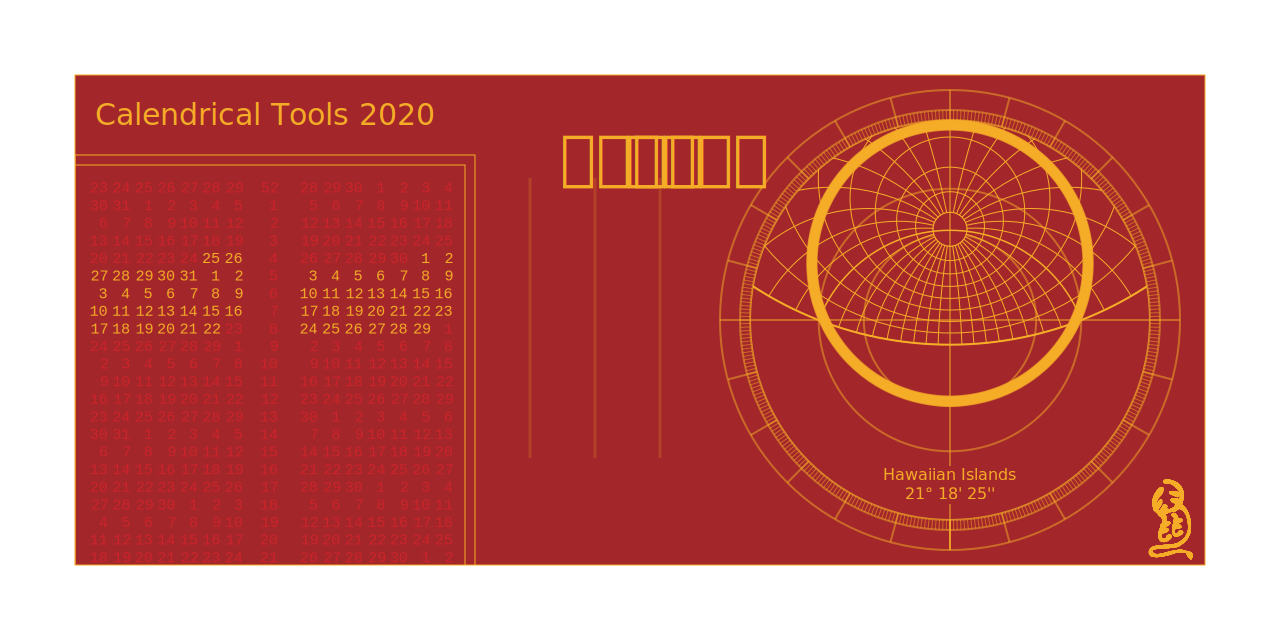

In [29]:
template = Template(card_template)
astrolabe_svg = astrolabe_svg.replace('21.3069', "21° 18' 25''")
card_svg = template.render(candybar=cal.svg, astrolabe=astrolabe_svg, 
                           rat=rat_svg, cal_color=cal_color)
SVG(card_svg)

In [30]:
with open('card.svg', 'w') as fp:
    fp.write(card_svg)

In [31]:
with open('card.svg') as fp:
    card_svg = fp.read()

In [32]:
try:
    import cairosvg
except Exception as ex:
    print('Exception {}. Install cairosvg: '.format(ex))
    !pip install cairosvg

In [33]:
# Need to convert svg to png.
import cairosvg

In [34]:
png = cairosvg.svg2png(card_svg)

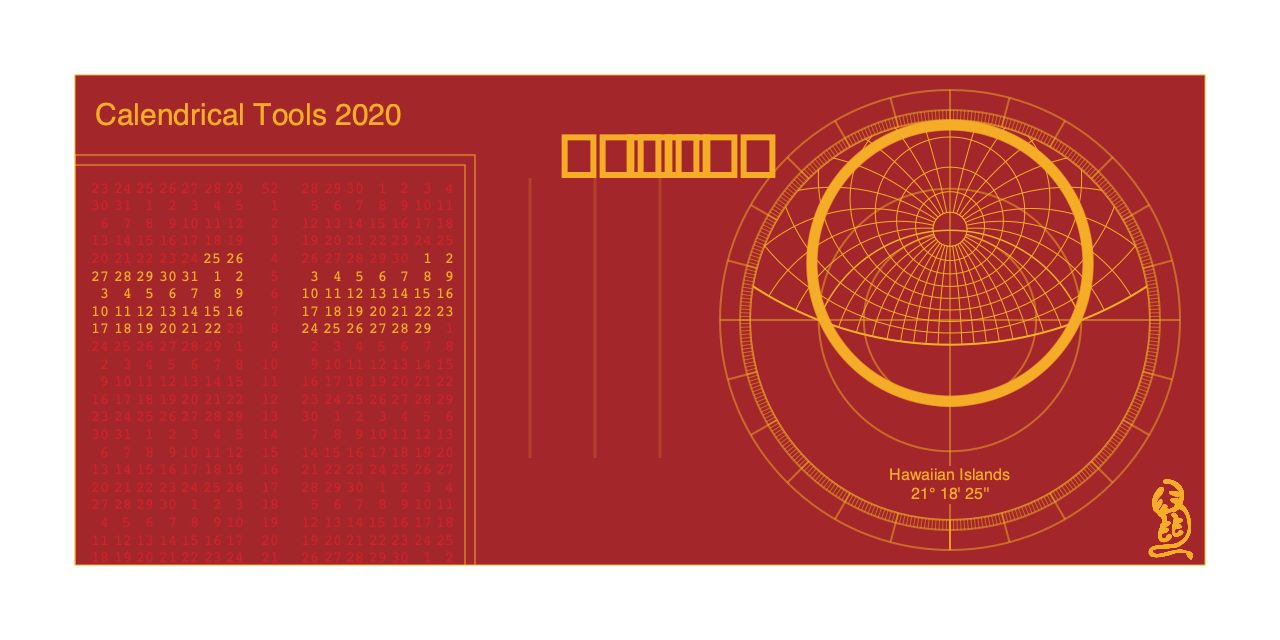

In [35]:
Image(png)